In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

plt.style.use('seaborn-whitegrid')

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_15703/3295185383.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


[0.2338834  0.29008434 0.19132294 0.25741337 0.4967276  0.39386554
 0.11295664 0.57678528 0.67641692 0.67763286 0.03629845 0.46627827
 0.40379637 0.41706249 0.8281811  0.8716389  0.57306806 0.91184228
 0.97828592 0.30356583 0.75767703 0.11440122 0.27065795 0.69173492
 0.12523752 0.98704522 0.71527252 0.7624187  0.99230416 0.02811085
 0.74316326 0.20197341 0.38819583 0.28303157 0.56982724 0.78065676
 0.09892013 0.0526156  0.11420922 0.40757753 0.49587992 0.55415029
 0.62147347 0.20733949 0.18471964 0.23731401 0.83151793 0.58915571
 0.94183202 0.70330621 0.80730991 0.74370045 0.46962706 0.02331564
 0.86608479 0.90945354 0.14982038 0.13717324 0.87999719 0.8977343
 0.44877945 0.24686135 0.55661733 0.86986028 0.93336435 0.69079281
 0.96371051 0.81363606 0.44923214 0.14792203 0.59157242 0.18883195
 0.23307969 0.43902253 0.67147783 0.60949727 0.48980044 0.86459697
 0.84276214 0.76824063 0.78289026 0.15661769 0.79144944 0.69237584
 0.93576521 0.92929074 0.42530116 0.45625372 0.4145227  0.84709

IndexError: arrays used as indices must be of integer (or boolean) type

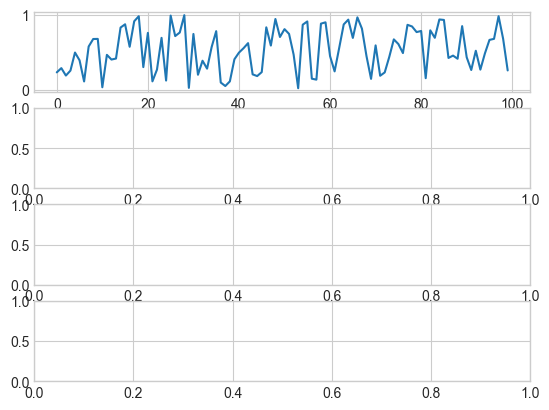

In [68]:
N: int = 100
x = np.random.rand(N)

fig, axs = plt.subplots(4)

axs[0].plot(x)
print(x)
for i in range(3):
    result = []
    for n in range(N):
        result.append(0)
        for k in range(N):
            result[n] += x[x] * x[k]

    x = np.copy(result)
    print(x)

    axs[i+1].plot(x)

plt.tight_layout()
plt.show()


In [70]:
N: int = 100
MAX_COEF: int = 123652

p = np.random.randint(-MAX_COEF, MAX_COEF, size=np.random.randint(0, N))
q = np.random.randint(-MAX_COEF, MAX_COEF, size=np.random.randint(0, N))

